## Build a multiple linear regression model for the prediction of demand for shared bikes

## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal :
   
- Build a model which will be used by management to understand the demand for shared bikes with the available independent variables. 
- Explain how exactly the demands vary with different features so that the business strategy can be modified to meet the demand levels and meet the customer's expectations. 
- Further, the model will be a good way for management to understand the demand dynamics of a new market. 
    
## ML Tasks:    

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.

#### Steps:
1. Reading, understanding and visualing the data
2. Preprocessing the data
   - Encode the categorical variables using dummy variables.
   - Divide into Train and Test data set.
   - Scaling on training data set
3. Building the model
   - Create X and Y variables
   - Use RFE and build initial model with RFE recommended features.
   - Feature selection and Iteratively work on better model by dropping features based on p-value and VIF
4. Model Evaluation
   - Prove that the assumptions of linear regression are true
   - Residual analysis
   - Scaling on test data set
   - Predict target variable using the fitted model
   - Evaluate the prediction on the test data set
5. Conclusion

## 0. Import necessary libraries

Ignore warnings and import necessary libraries:

### 0.1 Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To split into training-test data set
from sklearn.model_selection import train_test_split

# To scale the dataset
from sklearn.preprocessing import MinMaxScaler

# To get statistical information of the model
import statsmodels.api as sm

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To calculate the R-squared score, RMSE, MAE on the test set.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### 0.2 Suppressing Warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Step 1: Exploratory Data Analysis
## Step 1.1 : Reading and understanding data:
Read the given dataset into a dataframe called `bike_df`

In [3]:
bike_df = pd.read_csv('day.csv')
bike_df.head() # Checking the top 5 rows of the dataframe

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking botton 5 rows of the dataframe
bike_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


Inspect the various aspects of the `bike_df` dataframe such as 
- `shape` for number of rows and columns
- `size` for memory usage
- `info()` for the presence of null values
- `describe()` for statistical information

In [5]:
# Checking the shape of the dataframe
bike_df.shape

(730, 16)

There are `730` rows and `16` columns in the given dataset.

In [6]:
# Checking the size of the dataframe
bike_df.size

11680

In [7]:
# Inspecting type
print(bike_df.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [8]:
# How many types of each data type column exists and total memory usage
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Null Value analysis

In [9]:
# Looking for any null value in any column 
print(bike_df.isnull().any())

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


Both `info()` and `isnull().any()` output indicate that there are no null values in the given dataset.

In [10]:
# Checking the numerical columns data distribution
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
# Checking the number of unique values each column possess to identify categorical columns
bike_df.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

Both `nunique()` and `describe()` shows that there are some categorical variables in the dataframe which are in int format

- Columns such as `yr`, `holiday`, `workingday` have only 2 distinct values and hence its ok to keep these as int and use the same columns.
- Columns such as `weathersit`, `season`, `weekday`, `mnth` have around 3 to 12 distinct values and hence we will convert these columns to categorical data type.

#### Convert to Categorical Columns so that these can be used in Pandas get_dummies()

In [12]:
categorical_columns = ['season','mnth','weekday','weathersit']
for col in categorical_columns:
    bike_df[col] =pd.Categorical(bike_df[col])
bike_df.info() # Observe the data frame after conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     730 non-null    int64   
 1   dteday      730 non-null    object  
 2   season      730 non-null    category
 3   yr          730 non-null    int64   
 4   mnth        730 non-null    category
 5   holiday     730 non-null    int64   
 6   weekday     730 non-null    category
 7   workingday  730 non-null    int64   
 8   weathersit  730 non-null    category
 9   temp        730 non-null    float64 
 10  atemp       730 non-null    float64 
 11  hum         730 non-null    float64 
 12  windspeed   730 non-null    float64 
 13  casual      730 non-null    int64   
 14  registered  730 non-null    int64   
 15  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(7), object(1)
memory usage: 72.5+ KB


## Step 1.2 Visualizing the dataset

- We can identify whether any of the predictive features have association with the outcome variable.
- Find if there is any multicollinearity - any independent feature is correlated with another independent feature 

Lets visualize only the numerical variables and see if there is scope for linear regression:

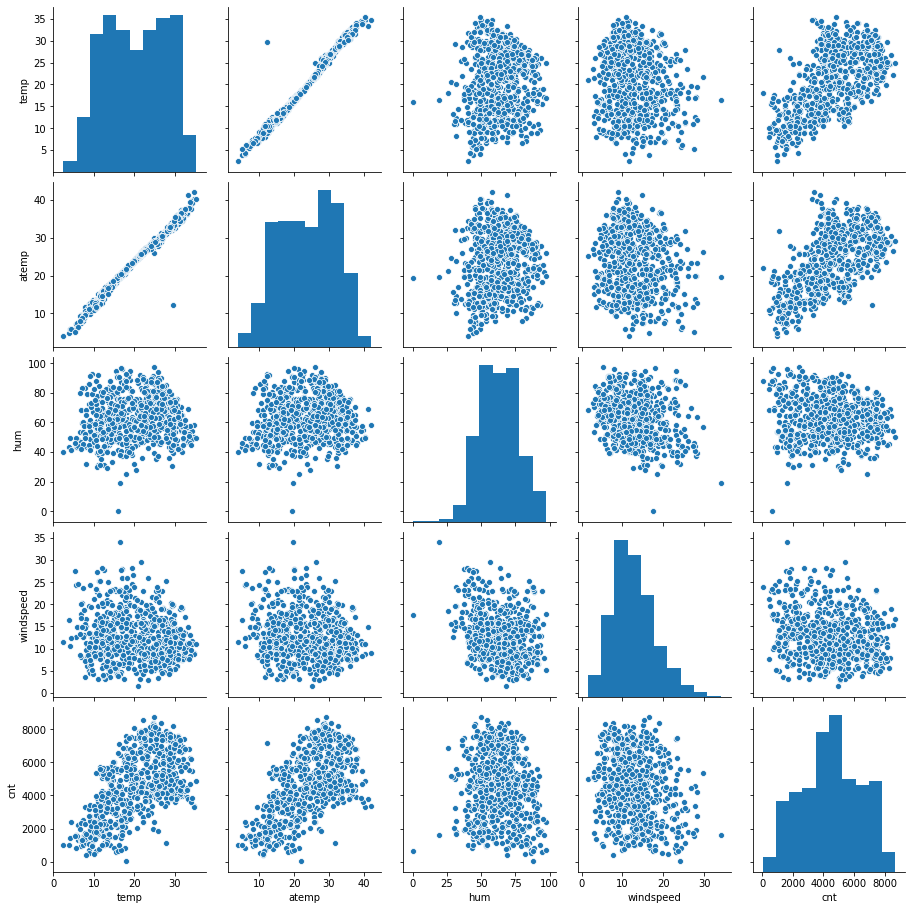

In [13]:
sns.pairplot(bike_df[['temp','atemp','hum','windspeed','cnt']])
plt.show()

#### INFERENCES:

- Looking at the pairplot among the numerical variables, the variables **temp** and **atemp** seem to have highest correlation with the target variable **cnt**
- There seem to be linear relationship between `temp`, `atemp`, other parameters and `cnt` which is target variable
- There seem to be strong correlation between `temp` and `atemp`
- Higher temperatures lead to an increasing number of bike rents and lower temperatures decrease the number of rents.
- There are few outliers in all the variables - `temp`, `atemp`, `hum`, `windspeed` which we can ignore for now.
- There are some of the zero number of rentals for few of the temperatures, atemp, humidity etc.  

Lets check correlation matrix to detect `multicolinearity`

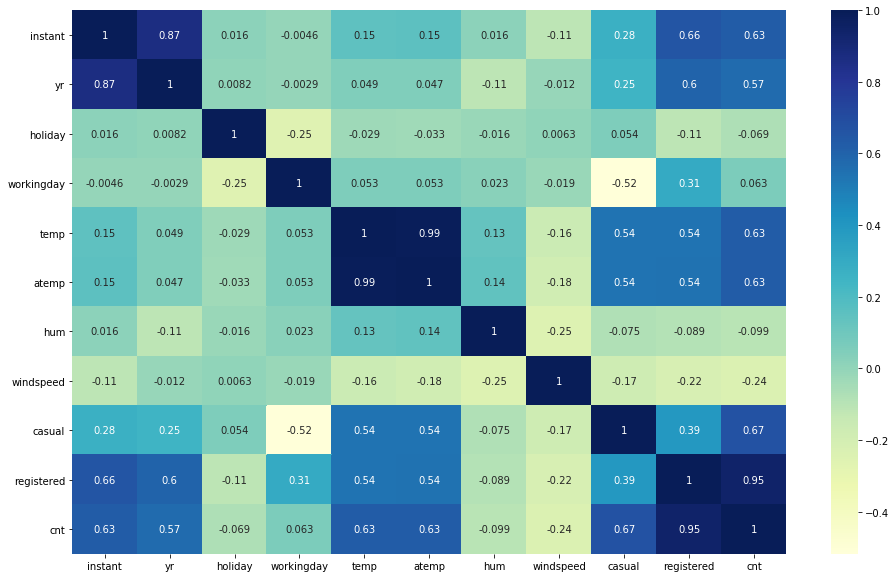

In [14]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(bike_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### INFERENCES:

- From correlation plot, we can observed that some features are positively correlated or some are negatively correlated to each other. 

- `casual` and `registered` contain direct information about the bike sharing count which we have to predict. Therefore we can remove these from the feature set.

- The variables `temp` and `atemp` are highly positively correlated which means both are having same information. 

We can drop either of `temp` or `atemp` as one of those can explain the other but `temp` is retained considering 
- it will be simpler measure for the business
- it will be used for calculating `atemp`
- `atemp` is a measure of multiple entries and any of the columns outliers, missing values will affect `atemp` and there is a more chance of error. 

So we can drop `atemp` before building the model itself as part of `dimensionality reduction` 

#### Dropping the unnecessary columns which are not required for building a model

Drop the following columns:
- `instant` (it has just record index)
- `dteday` (other fields represent this)
- `casual`,`registered` (represented by `cnt`) 
- `atemp` due to high correlation

In [15]:
drop_cols = ['instant', 'dteday', 'casual', 'registered','atemp']
bike_df.drop(labels=drop_cols,axis=1,inplace=True)
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


#### Visualising Categorical Variables

Let's visualize the categorical variables against count of rentals

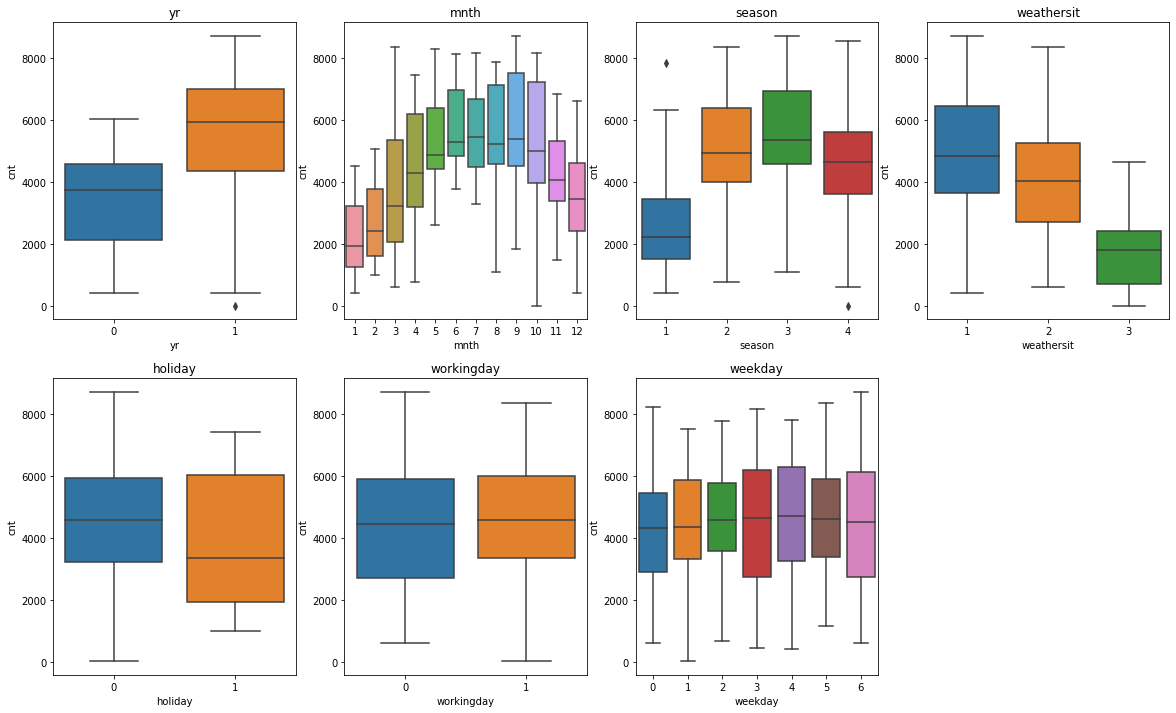

In [16]:
plt.figure(figsize=(20, 12))

features = ['yr','mnth','season','weathersit','holiday','workingday','weekday']

for i in enumerate(features):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(x = i[1], y = 'cnt', data = bike_df)
    plt.title(i[1])

#### INFERENCES:

- `yr` boxplot indicate that the demand for the bike has increased in 2019 compared to 2018.
- `working day` and `holiday` box plots indicate that more bicycles are rent during normal working days than on weekends or holidays. 
- From the `weathersit` plot, we can observe that during `clear,partly cloudy` weather the bike rental count is highest and the second highest is during `mist cloudy` weather and followed by during `light snow` and there is no rental data during `heavy rain` weather.
- From the `season` boxplot, we can observe that increasing the bike rental count in `fall` and `summer` season and then decreasing bike rental count in `spring` season
- There are very few outliers which we can ignore.


#### Univariate distribution

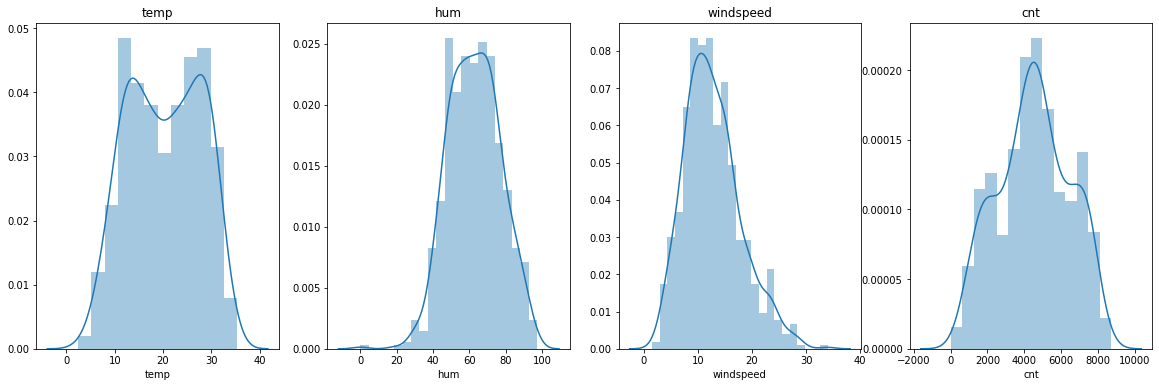

In [17]:
plt.figure(figsize=(20, 6))

features = ['temp','hum','windspeed','cnt']

for i in enumerate(features):
    plt.subplot(1,4,i[0]+1)
    sns.distplot(bike_df[i[1]])
    plt.title(i[1])
plt.show()

#### INFERENCES:

- `hum` seem to have few of the values as zero; need to check if its valid as relative humidity is usually above than 0.
- `temp` seem to have most of the values between 10 and 30.
- `hum` seem to have values across and most of the values range between 40 and 80.
- `windspeed` seem to have values between 10 and 20 mostly.

From the pair plot and other plots, its visible that **linear regression** can be applied to this business problem to predict the `cnt` variable


Equation of linear regression<br>
$cnt = const + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $cnt$ is the target
-  $const$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

We have to find the coefficients and the appropriate features to fit into linear regression model.

## Step 2: Data Preparation

### 2.1 Dummy Variables
- Linear regression assumes that all the numerical values are independent data points.
- When we have a categorical variable in a regression which takes more than two values, we can represent them using `dummy variables`
- The `dummy variables` will have only two quantitative values i.e. 0 and 1 and is easier to interpret.
- When the variable is present, it will take the value of 1 and absence of the variable is indicated by 0.
- For e.g. the variable `season` has four values like 1,2,3,4. We need to convert these levels into integer as well. 
But since these dummy variables would have column names as 1,2,3,4 and it will not give any meaning, its better to use the `data dictionary` provided and map these values to string
- For any categorical variable with `k` distinct values, we would need to create `k-1` dummy variables.
- For e.g. `season` have 4 distinct values and we can map those 4 values with 3 columns:

| summer | fall | winter |
|------|------|------|
|  1   |  0   |   0  |
|  0   |  0   |   1  |
|  0   |  1   |   0  |
|  0   |  0   |   0  |

All zeros would indicate `spring` and hence it does not require a separate column.

Once we have encoded the categorical variable as dummy variable, it can be used in the below linear regression equation:
$cnt = const + m_1x_1 + m_2x_2 + ... + m_nx_n$

where 
-  $x_1$ is the coefficient for the first level of categorical feature e.g. `summer`
-  $x_2$ is the coefficient for the second level of categorical feature e.g. `fall`
-  $m_n$ is the coefficient for the nth feature<br>

and `summer` which has `000` is the `base value` and all other groups are evaluated against this base group.



In [18]:
# Replacing the numbers with strings from data dictionary so that the column names will be meaningful

bike_df[['season']]=bike_df[['season']].apply(lambda x: x.map({1: "spring", 2: "summer", 3:"fall", 4:"winter"}))
bike_df[['mnth']]=bike_df[['mnth']].apply(lambda x: x.map({1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:"jun",7:"jul",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"}))
bike_df[['weekday']]=bike_df[['weekday']].apply(lambda x: x.map({1:"mon",2:"tue",3:"wed",4:"thur",5:"fri",6:"sat",0:"sun"}))
bike_df[['weathersit']]=bike_df[['weathersit']].apply(lambda x: x.map({1:"clear",2:"mist",3:"snow",4:"rain"}))

bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600


In [19]:
# Let's drop the first column from corresponding dummy variables in df using 'drop_first = True'
season = pd.get_dummies(bike_df['season'], drop_first = True)
mnth = pd.get_dummies(bike_df['mnth'], drop_first = True)
weekday = pd.get_dummies(bike_df['weekday'], drop_first = True)
weathersit = pd.get_dummies(bike_df['weathersit'], drop_first = True)

# Add the results to the original bike sharing dataframe
bike_df = pd.concat([bike_df, season,mnth,weekday,weathersit], axis = 1)

# Drop the categorical variables as we have created the dummies for it
bike_df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bike_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,nov,dec,mon,tue,wed,thur,fri,sat,mist,snow
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
bike_df.info() # Observe the dataframe after creation of dummy variables and dropping categorical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   summer      730 non-null    uint8  
 8   fall        730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  feb         730 non-null    uint8  
 11  mar         730 non-null    uint8  
 12  apr         730 non-null    uint8  
 13  may         730 non-null    uint8  
 14  jun         730 non-null    uint8  
 15  jul         730 non-null    uint8  
 16  aug         730 non-null    uint8  
 17  sep         730 non-null    uint8  
 18  oct         730 non-null    uint8  
 19  nov         730 non-null    u

- The categorical variables are converted to dummy variables.
- Dummy variables are concatenated with the original `bike_df` data frame
- Hence the actual categorical variables such as `season`, `mnth`, `weekday`, `weathersit` are deleted from the `bike_df`

### 2.2 Split the dataset into train and test dataset

We specify `random_state` so that the train and test data set always have the same rows; changing random state will change the analysis and the model. 

In [21]:
df_train, df_test = train_test_split(bike_df, train_size = 0.70, test_size = 0.30, random_state = 10) 

In [22]:
df_train.shape # Observe the train dataset shape

(510, 29)

In [23]:
df_test.shape# Observe the train dataset shape

(219, 29)

#### Null check on training and test dataset

In [24]:
df_train.isnull().any()

yr            False
holiday       False
workingday    False
temp          False
hum           False
windspeed     False
cnt           False
summer        False
fall          False
winter        False
feb           False
mar           False
apr           False
may           False
jun           False
jul           False
aug           False
sep           False
oct           False
nov           False
dec           False
mon           False
tue           False
wed           False
thur          False
fri           False
sat           False
mist          False
snow          False
dtype: bool

In [25]:
df_test.isnull().any()

yr            False
holiday       False
workingday    False
temp          False
hum           False
windspeed     False
cnt           False
summer        False
fall          False
winter        False
feb           False
mar           False
apr           False
may           False
jun           False
jul           False
aug           False
sep           False
oct           False
nov           False
dec           False
mon           False
tue           False
wed           False
thur          False
fri           False
sat           False
mist          False
snow          False
dtype: bool

One row seem to have missed from train_test_split. Lets ignore for now as its just one row. There are no null values in both the dataframes.

### 2.3 Scaling the numerical features on the training data set

- As see above, we can use linear algebra to solve this linear regression model. 
- Most of the times, your dataset will contain features highly varying in magnitudes, units and range. 
- Linear regression use distance between two data points in its computations. 
- If we do not scale, it only take in the magnitude of features neglecting the units. 
- The results would vary greatly between different units, 5kg and 5000gms. 
- The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.
- To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by **scaling**.
- If you rescale your independent variables, you will get identical regression results, except that the constant term and coefficients will be changed to offset the rescaling.

There are two common techniques in scaling:
1. **Min-Max Scaling** or **Normalization**:
   - Scales all the values between 0 and 1
   - Computes value using (x-xmin) / (xmax-xmin)
   
   
2. **Standardisation** :
   - Standardisation replaces the values by their Z scores
   - Computes value using (x-mu)/sigma
   - This redistributes the features with their mean μ = 0 and standard deviation σ =1
   
`Normalization` is chosen for this model building 

In [26]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns(only for continuous variables) except the 'yes-no' and 'dummy' variables
num_vars = ['temp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,nov,dec,mon,tue,wed,thur,fri,sat,mist,snow
323,0,0,0,0.478808,0.634717,0.337184,0.372933,0,0,1,...,1,0,0,0,0,0,0,0,1,0
72,0,0,1,0.298094,0.394939,0.236118,0.194978,0,0,0,...,0,0,1,0,0,0,0,0,0,0
510,1,0,0,0.778657,0.695953,0.364071,0.737052,1,0,0,...,0,0,0,0,0,0,0,1,0,0
700,1,0,0,0.327249,0.812033,0.210252,0.509236,0,0,1,...,0,1,0,0,0,0,0,0,1,0
264,0,0,1,0.694699,0.912672,0.217975,0.526862,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [27]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,nov,dec,mon,tue,wed,thur,fri,sat,mist,snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.033333,0.688235,0.512980,0.564620,0.343339,0.492266,0.256863,0.235294,0.260784,...,0.092157,0.094118,0.147059,0.149020,0.152941,0.137255,0.135294,0.147059,0.345098,0.033333
std,0.500429,0.179682,0.463669,0.233096,0.183343,0.162447,0.235984,0.437332,0.424599,0.439494,...,0.289531,0.292279,0.354512,0.356457,0.360284,0.344454,0.342373,0.354512,0.475867,0.179682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.314983,0.427182,0.227237,0.326754,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.506068,0.563897,0.323711,0.490945,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.721686,0.698806,0.434281,0.675812,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see from the `describe()` output that all the variables have values between 0(min) and 1(max). 

## Step 3: Building the model

### 3.1 : Dividing into X and Y sets for the model building

In [28]:
y_train = df_train.pop('cnt') # target variable 
X_train_initial = df_train # target variable should not be in predictor list
print(X_train_initial.head(),"\nY train:\n",y_train.head())

     yr  holiday  workingday      temp       hum  windspeed  summer  fall  \
323   0        0           0  0.478808  0.634717   0.337184       0     0   
72    0        0           1  0.298094  0.394939   0.236118       0     0   
510   1        0           0  0.778657  0.695953   0.364071       1     0   
700   1        0           0  0.327249  0.812033   0.210252       0     0   
264   0        0           1  0.694699  0.912672   0.217975       0     1   

     winter  feb  ...  nov  dec  mon  tue  wed  thur  fri  sat  mist  snow  
323       1    0  ...    1    0    0    0    0     0    0    0     1     0  
72        0    0  ...    0    0    1    0    0     0    0    0     0     0  
510       0    0  ...    0    0    0    0    0     0    0    1     0     0  
700       1    0  ...    0    1    0    0    0     0    0    0     1     0  
264       0    0  ...    0    0    0    0    0     1    0    0     1     0  

[5 rows x 28 columns] 
Y train:
 323    0.372933
72     0.194978
510    0.

### 3.2 Identify the top significant features using RFE ( Recursive Feature Elimination - automated approach)


In [29]:
# Use linear regression as the model and RFE to select 15 features
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(X_train_initial, y_train)

print("All features by their rank:")
print(sorted(list(zip(X_train_initial.columns,rfe.support_,rfe.ranking_))))

All features by their rank:
[('apr', False, 2), ('aug', True, 1), ('dec', False, 11), ('fall', True, 1), ('feb', False, 6), ('fri', False, 9), ('holiday', True, 1), ('hum', True, 1), ('jul', False, 10), ('jun', False, 3), ('mar', True, 1), ('may', True, 1), ('mist', True, 1), ('mon', False, 7), ('nov', False, 8), ('oct', True, 1), ('sat', False, 4), ('sep', True, 1), ('snow', True, 1), ('summer', True, 1), ('temp', True, 1), ('thur', False, 13), ('tue', False, 12), ('wed', False, 14), ('windspeed', True, 1), ('winter', True, 1), ('workingday', False, 5), ('yr', True, 1)]


In [30]:
col = X_train_initial.columns[rfe.support_]
print("RFE selected columns:\n", col)

RFE selected columns:
 Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'fall', 'winter',
       'mar', 'may', 'aug', 'sep', 'oct', 'mist', 'snow'],
      dtype='object')


### 3.3 Feature selection

Two main statistics to select the features:
- p-value of the feature
- VIFs.

**Hypothesis of the test** is that a feature is `insignificant` in the model and by having p-value less than 0.05, we `reject this hypothesis` and hence the feature is selected. So wherever the p-value of a feature is higher than 0.05, it indicates that we `failed to reject the hypothesis` that the feature is insignificant.

When there is a feature in the model that can be explained by other features, then the variable's VIF will be higher than 10 and we can eliminate those variables.

#### Strategies:

- When a feature has high p-value and high VIF, then it can be dropped first.
- When a feature has high p-value and low VIF, then we will drop it as it is not significant.
- When a feature has low p-value and high VIF, we try to drop other features which have higher p-value and if there is none, we will remove this feature and build the model and check the R-squared.
- When a feature has low p-value and low VIF, then it is significant and not explained by other features and hence we keep these features in the model.


#### Functions for building Linear regression model using statsmodels and calculate VIF using sklearn:

Iteratively we can drop the features one by one from the model using **p-value** and **VIF** and build the model using **statsmodels**

We will try to achieve a model not more than 10 variables and Rsquared is around 80 percent.

Following functions are created to call iteratively and build `linear regression` model using `statsmodels` and calculate `VIF` using `sklearn` and print statistics summary of each model.

In [31]:
def build_lr_model(feature_list):
    X_train = X_train_initial[feature_list] # get feature list 
    X_train_lm = sm.add_constant(X_train) # required by statsmodels 
    lr = sm.OLS(y_train, X_train_lm).fit() # build model and learn coefficients
    print("Co-efficients:\n",lr.params) # OLS coefficients
    print(lr.summary()) # OLS summary with R-squared, adjusted R-squared, p-value etc.
    calculate_vif(X_train) # Calculate VIF for features
    return(lr, X_train_lm) # return the model and the X_train fitted with constant

def calculate_vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns # Read the feature names
    vif['ViF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])] # calculate VIF
    vif['ViF'] = round(vif['ViF'],2)
    vif.sort_values(by='ViF', ascending = False, inplace=True)  
    print(vif) # prints the calculated VIFs for all the features

#### Model 1 : Use all 15 RFE selected features

In [32]:
features = list(col) #  Use RFE selected variables
lr_model1, X_train_lm1 = build_lr_model(features) # Call the function and get the model and the X_train_lm for prediction

Co-efficients:
 const        0.192940
yr           0.247764
holiday     -0.085885
temp         0.455166
hum         -0.173587
windspeed   -0.178944
summer       0.137383
fall         0.082696
winter       0.172726
mar          0.051105
may          0.033611
aug          0.041804
sep          0.119242
oct          0.070154
mist        -0.051695
snow        -0.201133
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.42e-191
Time:                        17:08:00   Log-Likelihood:                 494.60
No. Observations:                 510   AIC:                            -957.2
Df Residuals:                     494   BIC:                    

#### Model 2: Remove `may` as its p-value > 0.05

In [33]:
features = list(col) #  Use RFE selected variables
features.remove('may') # Remove 'may' from RFE features list
lr_model2, X_train_lm2 = build_lr_model(features) # Call the function and get the model and the X_train_lm for prediction

Co-efficients:
 const        0.188395
yr           0.247255
holiday     -0.086320
temp         0.463554
hum         -0.163960
windspeed   -0.180385
summer       0.145055
fall         0.076725
winter       0.169913
mar          0.046095
aug          0.041150
sep          0.118298
oct          0.068867
mist        -0.053254
snow        -0.205734
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          9.36e-192
Time:                        17:08:15   Log-Likelihood:                 492.83
No. Observations:                 510   AIC:                            -955.7
Df Residuals:                     495   BIC:                            -892.1
Df Mode

Now all the variables have p-value less than 0.05. We can check if there is `multi-collinearity` by looking at the `VIF` and remove features accordingly.

#### Model 3: Remove `temp` as its VIF is higher

In [34]:
features = list(col) #  Use RFE selected variables
features.remove('may') # Remove 'may' from RFE features list as per model 2
features.remove('temp') # Remove 'temp' from RFE features list
lr_model3, X_train_lm3 = build_lr_model(features) # Call the function and get the model and the X_train_lm for prediction

Co-efficients:
 const        0.262693
yr           0.259125
holiday     -0.087648
hum         -0.055455
windspeed   -0.176582
summer       0.282611
fall         0.310288
winter       0.220511
mar          0.043729
aug          0.044702
sep          0.114534
oct          0.126830
mist        -0.084231
snow        -0.279881
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     140.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.77e-157
Time:                        17:08:46   Log-Likelihood:                 407.46
No. Observations:                 510   AIC:                            -786.9
Df Residuals:                     496   BIC:                            -727.6
Df Model:                    

We can see that adjusted R-squared has significantly reduced from `0.843`(model 2) to `0.781`. Hence `temp` is an important predictor as we have seen in the pair plots and correlation heat map also. 

#### Revert to `model2`

In [35]:
features = list(col) #  Use RFE selected variables
features.remove('may') # Remove 'may' from features list as per model 2
lr_model2, X_train_lm2 = build_lr_model(features) # Call the function and get the model and the X_train_lm for prediction

Co-efficients:
 const        0.188395
yr           0.247255
holiday     -0.086320
temp         0.463554
hum         -0.163960
windspeed   -0.180385
summer       0.145055
fall         0.076725
winter       0.169913
mar          0.046095
aug          0.041150
sep          0.118298
oct          0.068867
mist        -0.053254
snow        -0.205734
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          9.36e-192
Time:                        17:09:00   Log-Likelihood:                 492.83
No. Observations:                 510   AIC:                            -955.7
Df Residuals:                     495   BIC:                            -892.1
Df Mode

#### Model 4: Remove `hum` as its VIF is higher

In [36]:
features = list(col) #  Use RFE selected variables
features.remove('may') # Remove 'may' from features list as per model 2
features.remove('hum')  # Remove 'hum' from features list
lr_model4, X_train_lm4 = build_lr_model(features) # Call the function and get the model and the X_train_lm for prediction

Co-efficients:
 const        0.106492
yr           0.255112
holiday     -0.086748
temp         0.426134
windspeed   -0.136121
summer       0.149738
fall         0.092509
winter       0.168419
mar          0.050280
aug          0.033568
sep          0.104885
oct          0.069480
mist        -0.086325
snow        -0.277112
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.58e-188
Time:                        17:09:11   Log-Likelihood:                 480.75
No. Observations:                 510   AIC:                            -933.5
Df Residuals:                     496   BIC:                            -874.2
Df Model:                    

Rsquared is not affected much. So removing `hum` is a good decision for the model. Lets proceed and check the stats.

Now p-value of `aug` is greater than 0.05 and hence we can drop this.

#### Model 5: Remove `aug` as its p-value > 0.05

In [37]:
features = list(col) #  Use RFE selected variables
features.remove('may') # Remove 'may' from features list as per model 2
features.remove('hum')  # Remove 'hum' from features list as per model 4
features.remove('aug') # Remove 'aug' from features list
lr_model5, X_train_lm5 = build_lr_model(features) # Call the function and get the model and the X_train_lm for prediction

Co-efficients:
 const        0.105428
yr           0.255072
holiday     -0.089026
temp         0.427888
windspeed   -0.134910
summer       0.149138
fall         0.105653
winter       0.169682
mar          0.050116
sep          0.094074
oct          0.067811
mist        -0.085457
snow        -0.277923
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     216.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.01e-188
Time:                        17:09:24   Log-Likelihood:                 479.32
No. Observations:                 510   AIC:                            -932.6
Df Residuals:                     497   BIC:                            -877.6
Df Model:                          12              

Now all the variables have p-value less than 0.05. So lets check the `VIF` to find if there is `multi-collinearity` and remove features accordingly. As we have seen already `temp` is an important predictor. So we will try to remove the next high `VIF` variable `fall` and see if `VIF` of `temp` is reduced by removing `fall` from the model.

#### Model 6: Remove `fall` as its VIF is higher

In [38]:
features = list(col) #  Use RFE selected variables
features.remove('may') # Remove 'may' from features list as per model 2
features.remove('hum') # Remove 'hum' from features list as per model 4 
features.remove('aug') # Remove 'aug' from features list as per model 5
features.remove('fall') # Remove 'aug' from features list
lr_model6, X_train_lm6 = build_lr_model(features) # Call the function and get the model and the X_train_lm for prediction

Co-efficients:
 const        0.094133
yr           0.253161
holiday     -0.091921
temp         0.551736
windspeed   -0.141460
summer       0.093664
winter       0.133270
mar          0.040021
sep          0.110282
oct          0.053767
mist        -0.085366
snow        -0.271162
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.14e-184
Time:                        17:09:40   Log-Likelihood:                 467.61
No. Observations:                 510   AIC:                            -911.2
Df Residuals:                     498   BIC:                            -860.4
Df Model:                          11                                    

Now all the p-values are less than 0.05 indicating that all these features are signicant. 

VIF is also in acceptable range. 

Total number of features in this `model6` is 11, which is slightly above our targeted features.

So lets check deleting `mar`(OLS coefficient: 0.04) or `oct`(0.05) which have very less OLS coefficient one by one and see how the model is affected.

We are going for less OLS coefficient as these will have less impact by the best fit line equation. i.e. one unit of change in these features will only bring about 0.04 or 0.05 units of change in the target variable.

#### Model 7: Remove `mar` whose OLS coefficient is 0.04 

In [39]:
features = list(col) #  Use RFE selected variables
features.remove('may') # Remove 'may' from features list as per model 2
features.remove('hum') # Remove 'hum' from features list as per model 4 
features.remove('aug') # Remove 'aug' from features list as per model 5
features.remove('fall') # Remove 'aug' from features list as per model 6
features.remove('mar') # Remove 'fall' from features list
lr_model7, X_train_lm7 = build_lr_model(features) # Call the function and get the model and the X_train_lm for prediction

Co-efficients:
 const        0.102943
yr           0.253272
holiday     -0.095766
temp         0.541389
windspeed   -0.139141
summer       0.094848
winter       0.127687
sep          0.108968
oct          0.054869
mist        -0.084398
snow        -0.271401
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     243.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.37e-184
Time:                        17:10:06   Log-Likelihood:                 464.57
No. Observations:                 510   AIC:                            -907.1
Df Residuals:                     499   BIC:                            -860.6
Df Model:                          10                                         
Covariance Type:

The impact is not much on the model. Rsquared has reduced from 0.832 to 0.83 and adjusted Rsquared has reduced from 0.828 to 0.826. 

So it seems removing `mar` does not have much impact and hence lets drop this.

We now have 10 features still lets proceed checking whether deleting `oct` has significant impact on the model. If not, deleting it would help to bring the number of features to 9.

#### Model 8: Remove `oct` whose OLS coefficient is 0.05

In [40]:
features = list(col) #  Use RFE selected variables
features.remove('may') # Remove 'may' from features list as per model 2
features.remove('hum') # Remove 'hum' from features list as per model 4 
features.remove('aug') # Remove 'aug' from features list as per model 5
features.remove('fall') # Remove 'aug' from features list as per model 6
features.remove('mar') # Remove 'fall' from features list as per model 7
features.remove('oct') # Remove 'fall' from features list
lr_model8, X_train_lm8 = build_lr_model(features) # Call the function and get the model and the X_train_lm for prediction

Co-efficients:
 const        0.097270
yr           0.254397
holiday     -0.097409
temp         0.552135
windspeed   -0.138606
summer       0.093192
winter       0.145689
sep          0.101067
mist        -0.083396
snow        -0.265879
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.72e-184
Time:                        17:10:19   Log-Likelihood:                 460.21
No. Observations:                 510   AIC:                            -900.4
Df Residuals:                     500   BIC:                            -858.1
Df Model:                           9                                         
Covariance Type:            nonrobust 

The impact is not much on the model. Rsquared has reduced from 0.83 to 0.827 and adjusted Rsquared has reduced from 0.826 to 0.824.

So it seems removing `oct` does not have much impact and hence lets drop this.

We now have 9 features and let try deleting `mist` whose OLS coefficient is -0.08 and see how the model stats are.

#### Model 9: Remove `mist` whose OLS coefficient is -0.08

In [41]:
features = list(col) #  Use RFE selected variables
features.remove('may') # Remove 'may' from features list as per model 2
features.remove('hum') # Remove 'hum' from features list as per model 4 
features.remove('aug') # Remove 'aug' from features list as per model 5
features.remove('fall') # Remove 'aug' from features list as per model 6
features.remove('mar') # Remove 'fall' from features list as per model 7
features.remove('oct') # Remove 'fall' from features list as per model 8
features.remove('mist') # Remove 'mist' from features list
lr_model9, X_train_lm9 = build_lr_model(features) # Call the function and get the model and the X_train_lm for prediction

Co-efficients:
 const        0.059010
yr           0.255470
holiday     -0.091818
temp         0.573919
windspeed   -0.131912
summer       0.084171
winter       0.137582
sep          0.085300
snow        -0.231995
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     250.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.39e-169
Time:                        17:10:32   Log-Likelihood:                 423.46
No. Observations:                 510   AIC:                            -828.9
Df Residuals:                     501   BIC:                            -790.8
Df Model:                           8                                         
Covariance Type:            nonrobust                       

Here the Rsquared has reduced significantly from 0.827 to 0.8 and this indicates `mist` and other features are significant to compute `cnt`. 

So lets revert to model 8 and proceed our residual analysis, linear regression assumptions and the predict using X_test and compare our prediction with the available Y_test

### 3.4 FINAL MODEL

In [42]:
features = list(col) #  Use RFE selected variables
features.remove('may') # Remove 'may' from features list as per model 2
features.remove('hum') # Remove 'hum' from features list as per model 4 
features.remove('aug') # Remove 'aug' from features list as per model 5
features.remove('fall') # Remove 'fall' from features list as per model 6
features.remove('mar') # Remove 'mar' from features list as per model 7
features.remove('oct') # Remove 'oct' from features list as per model 8
lr_model, X_train_lm = build_lr_model(features) # Call the function and get the model and the X_train_lm for prediction

Co-efficients:
 const        0.097270
yr           0.254397
holiday     -0.097409
temp         0.552135
windspeed   -0.138606
summer       0.093192
winter       0.145689
sep          0.101067
mist        -0.083396
snow        -0.265879
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.72e-184
Time:                        17:11:01   Log-Likelihood:                 460.21
No. Observations:                 510   AIC:                            -900.4
Df Residuals:                     500   BIC:                            -858.1
Df Model:                           9                                         
Covariance Type:            nonrobust 

#### Selected features of the model and its coefficients

In [43]:
lr_model.params

const        0.097270
yr           0.254397
holiday     -0.097409
temp         0.552135
windspeed   -0.138606
summer       0.093192
winter       0.145689
sep          0.101067
mist        -0.083396
snow        -0.265879
dtype: float64

#### Model evaluation

In [44]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     265.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.72e-184
Time:                        17:11:12   Log-Likelihood:                 460.21
No. Observations:                 510   AIC:                            -900.4
Df Residuals:                     500   BIC:                            -858.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0973      0.018      5.428      0.000       0.062       0.132
yr             0.2544      0.009     28.741      0.000       0.237       0.272
holiday       -0.0974      0.025     -3.971      0.000      -0.146      -0.049
temp           0.5521      0.021     26.749      0.000       0.512       0.593
windspeed     -0.1386      0.028     -4.940      0.000      -0.194      -0.083
summer         0.0932      0.011      8.379      0.000       0.071       0.115
winter         0.1457      0.011     13.177      0.000       0.124       0.167
sep            0.1011      0.016      6.176      0.000       0.069       0.133
mist          -0.0834      0.009     -8.805      0.000      -0.102      -0.065
snow          -0.2659      0.025    -10.507      0.000      -0.316      -0.216
==============================================================================
Omnibus:                       48.038   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.264
Skew:                          -0.570   Prob(JB):                     9.23e-21
Kurtosis:                       4.744   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3.5 Interpreting the regression results

- R-squared of the model(82.7%) and adjusted R-sqaured(82.4%) indicate that the selected `9` features are significant for prediction.
- P(F-statistic) of the model is close to 0 which indicates that this model is a good fit.
- Coefficients of the features indicate how they are related with `cnt`.


Top 3 significant features that contribute towards explaining towards the demand of the shared bikes:
1. **temp** with coefficient 0.55 indicating as temperature increases, the demand for bikes increase.
2. **snow** with coefficient -0.2659 indicating when there is snow, there is less demand for bikes.
3. **yr** with coefficient 0.25 indicating that the bike demand has increased from last year and is expected to increase in future.

### 3.6 Best Fit Line:

We can formulate the equation of our best fitted line as

cnt = 0.0973 + 0.55  \times  **temp** - 0.2659 \times **weathersit being 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds** + 0.25 \times **yr being 2019** - 0.1386 \times **windspeed** + 0.1457 \times **season being 4:winter** + 0.1011 \times **mnth being 9:sep** + 0.0932 \times **season being 2:summer** - 0.0834 \times **weathersit being 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist** - 0.0974 \times **holiday according to http://dchr.dc.gov/page/holiday-schedule**

where `weathersit being 3: Light Snow` is boolean value and if its true, the number of bike rentals go down by 0.2659 and so on for other categorical variables. 

## 4 Model Evaluation

### 4.1 Assumptions of Linear Regression:

Linear regression model is based on the following assumption and we will prove these assumptions with the model we built:

1. **Linear relationship** between X and Y: This was proved in the pair plot
2. Error terms are **normally distributed**
3. Error terms are **independent of each other**
4. Error terms have constant variance (**homoscedasticity**)

### 4.2 Residual analysis on training dataset

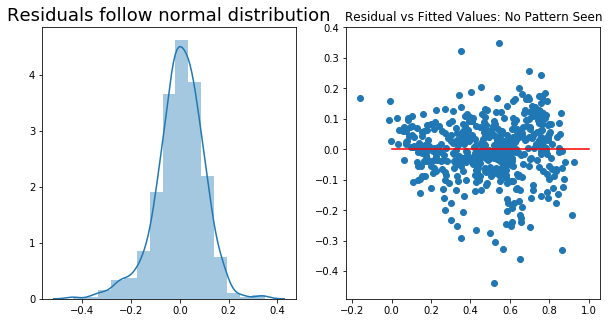

In [45]:
y_train_predicted = lr_model.predict(X_train_lm) # get predicted value on training dataset using statsmodels predict()
residual_values = y_train - y_train_predicted # difference in actual Y and predicted value
plt.figure(figsize=[10,5])
plt.subplot(121)
sns.distplot(residual_values, bins = 15) # Plot the histogram of the error terms
plt.title('Residuals follow normal distribution', fontsize = 18)
plt.subplot(122) 
plt.scatter(y_train_predicted, residual_values) # Residual vs Fitted Values
plt.plot([0,0],'r') # draw line at 0,0 to show that residuals have constant variance
plt.title('Residual vs Fitted Values: No Pattern Seen')
plt.show()

#### INFERENCES:

1. From first plot, it can be proved that `Residuals follow normal distribution and centered around zero`
2. From second plot, it can be proved that `Residuals do not follow any pattern indicating error terms are independent`
3. Also from second plot, we can see that `Error terms have constant variance and do not exhibit Heteroskedasticity`
4. Also from second plot, we can see that the `linear relationship is evident`

### 4.3 Scaling the numerical features on the test data set

Now that we have fitted the model and checked the normality of error terms and proved the assumptions of linear regression hold true for this model, it's time to go ahead and make predictions using the final model.

Use __transform()__ on test data set using the scaler created with scaled parameters of training data set for prediction.

In [46]:
num_vars = ['temp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars]) # Use the scaler of training data set and transform test dataset
y_test = df_test.pop('cnt') # actual target values 
X_test = df_test # remove target variable from the features

### 4.4 Predict target variable using the fitted model

In [47]:
# Creating X_test_model dataframe by selecting features of the model
print("Model features are ", features)
X_test_model = X_test[features] # features have the list of variables in the model
print("Checking test data set features: " , X_test_model.columns)

X_test_model = sm.add_constant(X_test_model) # Adding constant variable as required by statsmodels

# Making predictions using the final model
y_predicted_model = lr_model.predict(X_test_model)

Model features are  ['yr', 'holiday', 'temp', 'windspeed', 'summer', 'winter', 'sep', 'mist', 'snow']
Checking test data set features:  Index(['yr', 'holiday', 'temp', 'windspeed', 'summer', 'winter', 'sep', 'mist',
       'snow'],
      dtype='object')


### 4.5 Evaluate the prediction of the model using R2score and RMSE

#### Root mean square error ( RMSE )


In [48]:
rmse = sqrt(mean_squared_error(y_test,y_predicted_model))
print('Root mean square error :',rmse)

Root mean square error : 0.09807863678249877


#### Mean absolute error (MAE)

In [49]:
mae=mean_absolute_error(y_test,y_predicted_model)
print('Mean absolute error :',mae)

Mean absolute error : 0.07360211552044463


Low RMSE and MAE values indicate that the model is good.

#### Train R2 score

In [50]:
train_r2 = round(r2_score(y_train, y_train_predicted),3)
train_r2

0.827

#### Train Adjusted R2 score:

adj r2=1-(1-R2)*(n-1)/(n-p-1)

where n is the sample size
and p is the number of features

In [51]:
n = df_train.shape[0]
p = len(features)
print(n,p)

510 9


n=510 for training data set and p=9

In [52]:
round(1-(1-train_r2)*(n-1)/(n-p-1),3) 

0.824

This score matches the statsmodels summary R2 and adjusted R2.

#### Test R2 score

In [53]:
test_r2 = round(r2_score(y_test, y_predicted_model),4)
test_r2

0.8155

#### Test Adjusted R2 score:

adj r2=1-(1-R2)*(n-1)/(n-p-1)

where n is the sample size
and p is the number of features

In [54]:
n = df_test.shape[0]
p = len(features)
print(n,p)

219 9


n=219 for test data set and p=9

In [55]:
round(1-(1-test_r2)*(n-1)/(n-p-1),4)

0.8076

The difference between R2 score of train and test data set seem less than 5 percent hence this model is good for prediction

## 5. CONCLUSION

#### Answering the original questions of this task:

1. Which variables are significant in predicting the demand for shared bikes?

In [56]:
features

['yr',
 'holiday',
 'temp',
 'windspeed',
 'summer',
 'winter',
 'sep',
 'mist',
 'snow']

2. How well those variables describe the bike demands

In [57]:
lr_model.params

const        0.097270
yr           0.254397
holiday     -0.097409
temp         0.552135
windspeed   -0.138606
summer       0.093192
winter       0.145689
sep          0.101067
mist        -0.083396
snow        -0.265879
dtype: float64

cnt = 0.0973 + 0.55  \times  **temp** - 0.2659 \times **weathersit being 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds** + 0.25 \times **yr being 2019** - 0.1386 \times **windspeed** + 0.1457 \times **season being 4:winter** + 0.1011 \times **mnth being 9:sep** + 0.0932 \times **season being 2:summer** - 0.0834 \times **weathersit being 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist** - 0.0974 \times **holiday according to http://dchr.dc.gov/page/holiday-schedule**

#### Impact of categorical variables on the prediction:

This equation has the following categorical variables:

- `Weathersit` being 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds or 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- `Yr` being 2019
- `season` being 4:winter or 2:summer
- `mnth` being 9:sep
- `holiday` being 1

Weathersit has 3 values in dataset and they are denoted by columns mist and snow as
- `Clear` is represented as 00
- `Mist` is represented as 10
- `Snow` is represented as 01

So when the weathersit is **Clear**, then the above equation becomes 

cnt = 0.0973 + 0.55 \times temp + 0.25 \times yr being 2019 - 0.1386 \times windspeed + 0.1457 \times season being 4:winter + 0.1011 \times mnth being 9:sep + 0.0932 \times season being 2:summer - 0.0974 \times holiday 

When the weathersit is **Mist**, then the equation becomes

cnt = 0.0973 + 0.55 \times temp + 0.25 \times yr being 2019 - 0.1386 \times windspeed + 0.1457 \times season being 4:winter + 0.1011 \times mnth being 9:sep + 0.0932 \times season being 2:summer - 0.0834 - 0.0974 \times holiday

i.e. The cnt reduces by 0.08 when compared to weathersit being Clear.


When the weathersit is **Snow**, then the equation becomes

cnt = 0.0973 + 0.55 \times temp - 0.2659 + 0.25 \times yr being 2019 - 0.1386 \times windspeed + 0.1457 \times season being 4:winter + 0.1011 \times mnth being 9:sep + 0.0932 \times season being 2:summer - 0.0974 \times holiday

i.e. cnt reduces by 0.2659 when compared to weathersit being Clear.

Features such as 
- Temperature in Celsius
- Weathersit being `Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist` or `Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds` have negative impact
- Year
- Windspeed having negative impact
- Season being `summer` or `winter` have positive impact
- Month being `September` having positive impact
- Day being `holiday` have negative impact

on bike demand in the order detailed here.


#### FINAL COMMENTS and SUGGESTIONS

So `BoomBikes` can anticipate the demand for bikes 
- on workingdays 
- in the month of September
- when the temperature is between 10 and 30
- when the windspeed is less than 20
- when the season is summer or winter
- weather is clear

and with year, the demand seem to be increasing and hence once the corona pandemic effect is gone, the demand for bikes will increase according to the above features.